<a href="https://colab.research.google.com/github/prateekagrawal27/MyProject1/blob/master/Naive_bayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [111]:
import pandas as pd
from sklearn import datasets
import numpy as np
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
%matplotlib inline
data = datasets.fetch_20newsgroups()



In [112]:
Types = ['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']
train = datasets.fetch_20newsgroups(subset= 'train' ,categories = Types)
test = datasets.fetch_20newsgroups(subset= 'test' ,categories = Types)


In [113]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

In [114]:
mnb= make_pipeline(TfidfVectorizer(), MultinomialNB())
mnb.fit(train.data, train.target)
predictions=mnb.predict(test.data)

In [121]:
from sklearn import metrics
cm= metrics.confusion_matrix(test.target,predictions)
print(cm)

[[166   0   0   1   0   1   0   0   1   1   1   3   0   6   3 123   4   8
    0   1]
 [  1 252  15  12   9  18   1   2   1   5   2  41   4   0   6  15   4   1
    0   0]
 [  0  14 258  45   3   9   0   2   1   3   2  25   1   0   6  23   2   0
    0   0]
 [  0   5  11 305  17   1   3   6   1   0   2  19  13   0   5   3   1   0
    0   0]
 [  0   3   8  23 298   0   3   8   1   3   1  16   8   0   2   8   3   0
    0   0]
 [  1  21  17  13   2 298   1   0   1   1   0  23   0   1   4  10   2   0
    0   0]
 [  0   1   3  31  12   1 271  19   4   4   6   5  12   6   3   9   3   0
    0   0]
 [  0   1   0   3   0   0   4 364   3   2   2   4   1   1   3   3   4   0
    1   0]
 [  0   0   0   1   0   0   2  10 371   0   0   4   0   0   0   8   2   0
    0   0]
 [  0   0   0   0   1   0   0   4   0 357  22   0   0   0   2   9   1   1
    0   0]
 [  0   0   0   0   0   0   0   1   0   4 387   1   0   0   1   5   0   0
    0   0]
 [  0   2   1   0   0   1   1   3   0   0   0 383   1   0   0   3

Text(89.17999999999999, 0.5, 'Predicted category')

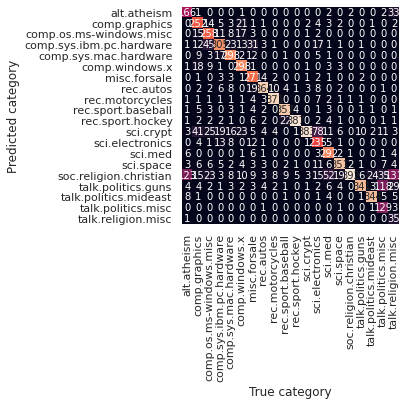

In [150]:
sns.heatmap(cm.T, square=True, annot=True, fmt='d', cbar=False , xticklabels =train.target_names, yticklabels=train.target_names)
plt.xlabel('True category')
plt.ylabel('Predicted category')

In [124]:


def pred_cat(s, train=train,model=mnb):
   pred= mnb.predict([s])
   return train.target_names[pred[0]] 